In [1]:
from sshtunnel import SSHTunnelForwarder
import getpass
username = input()
passwd = getpass.getpass()
server = SSHTunnelForwarder(
  'ipfs.meekoracc.com',
  ssh_username=username,
  ssh_password=passwd,
  remote_bind_address=('127.0.0.1', 27017)
)

In [2]:
server.start()

In [3]:
print(server.local_bind_port)

38437


In [4]:
import pymongo
conn_str = "mongodb://localhost:38437/"
client =  pymongo.MongoClient(conn_str, serverSelectionTimeoutMS=5000)

In [5]:
try:
  print(client.server_info())
except Exception:
  print("Unable to connect.")

{'version': '5.0.3', 'gitVersion': '657fea5a61a74d7a79df7aff8e4bcf0bc742b748', 'modules': [], 'allocator': 'tcmalloc', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [5, 0, 3, 0], 'openssl': {'running': 'OpenSSL 1.1.1f  31 Mar 2020', 'compiled': 'OpenSSL 1.1.1f  31 Mar 2020'}, 'buildEnvironment': {'distmod': 'ubuntu2004', 'distarch': 'x86_64', 'cc': '/opt/mongodbtoolchain/v3/bin/gcc: gcc (GCC) 8.5.0', 'ccflags': '-Werror -include mongo/platform/basic.h -fasynchronous-unwind-tables -ggdb -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -fno-omit-frame-pointer -fno-strict-aliasing -O2 -march=sandybridge -mtune=generic -mprefer-vector-width=128 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -Wa,--nocompress-debug-sections -fno-builtin-memcmp', 'cxx': '/opt/mongodbtoolchain/v3/bin/g++: g++ (GCC) 8.5.0', 'cxxflags': '-Woverloaded-vi

In [6]:
db = client.get_database('sixtwoone')
print(client.list_database_names())

['admin', 'config', 'local', 'sixtwoone']


In [7]:
posts = db.get_collection('posts')

In [8]:
posts.count_documents({"copyright": {"$in" : ["beastars"]}})

7312

In [9]:
beastars_posts = posts.find({"copyright": {"$in" : ["beastars"]}}, { "created_at": 1, "rating": 1, "fav_count": 1, "character": 1, "species": 1, "general": 1, "artist": 1 })

In [10]:
import pandas as pd
list_cur = list(beastars_posts)
df = pd.DataFrame(list_cur)

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'], utc=True)

In [12]:
df.sort_values(by='created_at', ascending=True).head()

,_id,created_at,rating,fav_count,general,species,character,artist
0,1243630,2017-06-15 05:20:46.790000+00:00,s,37,"[anthro, bag, clothed, clothing, looking_down,...","[canid, canine, canis, mammal, wolf]",[legoshi_(beastars)],[bluedouble]
1,1412509,2017-12-29 21:17:06.606000+00:00,s,134,"[anthro, blue_background, disembodied_hand, du...","[canid, canine, canis, human, mammal, primate,...",[legoshi_(beastars)],[nekopunch_ahya]
2,1434864,2018-01-23 13:01:42.078000+00:00,s,46,"[anthro, cheek_tuft, claws, clothed, clothing,...","[canid, canine, canis, mammal, wolf]",[legoshi_(beastars)],[mucknagabe]
4,1475709,2018-03-06 22:59:18.893000+00:00,q,306,"[ambiguous_gender, anthro, clothed, clothing, ...","[canid, canine, canis, mammal, reptile, scalie...","[legoshi_(beastars), rokume_(beastars)]",[ayvore]
3,1475710,2018-03-06 23:00:04.035000+00:00,e,224,"[anthro, digestion, disolve, erection, genital...","[canid, canine, canis, mammal, wolf]",[legoshi_(beastars)],[ayvore]


<AxesSubplot:xlabel='created_at', ylabel='Count'>

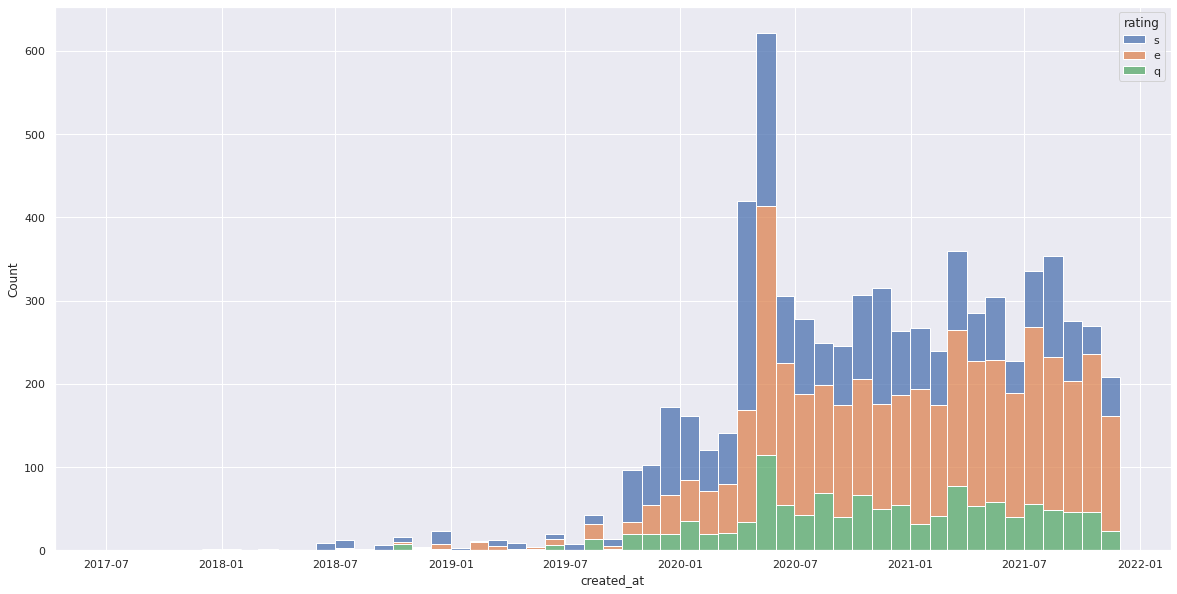

In [13]:
import matplotlib as mpl
import seaborn as sns
sns.set(rc={"figure.figsize":(20,10)})
bins = pd.date_range(start = df['created_at'].min(),end = df['created_at'].max(),freq='1M')
sns.histplot(df, x='created_at', hue="rating", multiple="stack", bins=mpl.dates.date2num(bins))

In [14]:
df.to_json('./beastars.json', orient='records')